In [1]:
!pip install opencv-python

In [2]:
import random
import cv2
from PIL import Image, ImageDraw #Подключим необходимые библиотеки.
from IPython.display import Image as Disp

In [3]:
#imageName = input('image name:') #Считываем Имя изображения.

#if len(imageName) == 0:
imageName = 'temp.jpg'
#print('image name = ' + str(imageName))

image = Image.open(imageName) #Открываем изображение. 
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 	
pix = image.load() #Выгружаем значения пикселей.

Исходное изображение:


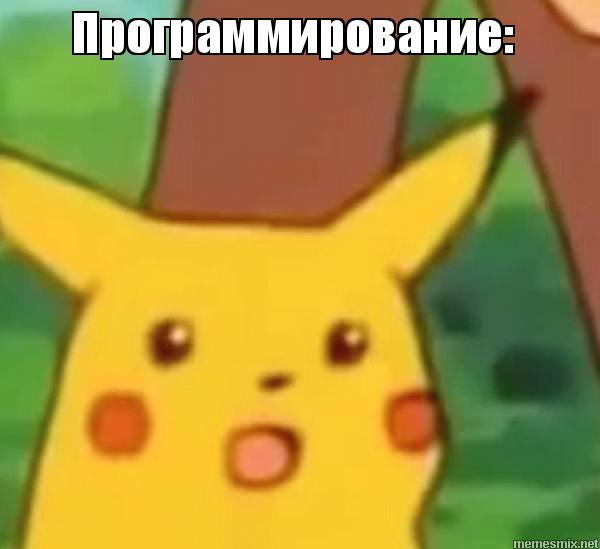

In [4]:
print('Исходное изображение:')
Disp(filename=imageName)

In [5]:
for i in range(width):
    for j in range(height):
        r = pix[i, j][0]
        g = pix[i, j][1]
        b = pix[i, j][2]
        S = round(0.2126 * r) + round(0.7152 * g) + round(0.0722 * b)
        draw.point((i, j), (S, S, S))

In [6]:
image.save("grey.jpg", "JPEG")

В градациях серого:


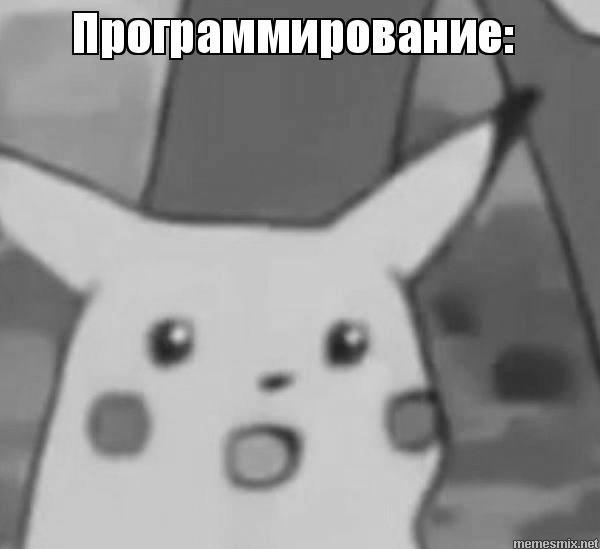

In [7]:
print('В градациях серого:')
Disp(filename='grey.jpg')

# Гамма коррекция:

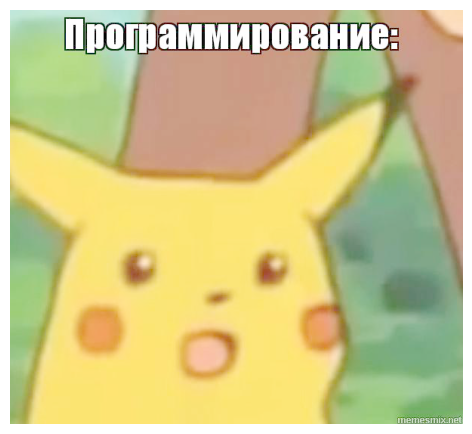

In [8]:
import imageio
import matplotlib.pyplot as plt
# Gamma encoding
pic = imageio.imread(imageName)
gamma = 2.2 # Gamma < 1 ~ Dark ; Gamma > 1 ~ Bright
gamma_correction = ((pic/255) ** (1/gamma))
#plt.figure(figsize = (5,5))
plt.figure(figsize = (6.0,5.49), dpi=100)
plt.imshow(gamma_correction)
plt.axis('off')

#plt.figure(figsize=(6.0,5.49), dpi=100)
plt.savefig('gamma.jpg')

#fig = plt.gcf()
#fig.set_size_inches(6.0, 5.49)
#fig.savefig('gamma.jpg', dpi=100)

#print(gamma_correction)

imgg = Image.open('gamma.jpg') #Открываем изображение. 
drawg = ImageDraw.Draw(imgg) #Создаем инструмент для рисования. 
width = imgg.size[0] #Определяем ширину. 
height = imgg.size[1] #Определяем высоту.
for i in range(width):
    for j in range(height):
        r = int(255 * gamma_correction[j][i][0])
        g = int(255 * gamma_correction[j][i][1])
        b = int(255 * gamma_correction[j][i][2])
        drawg.point((i, j), (r, g, b))


imgg.save("gamma.jpg", "JPEG")

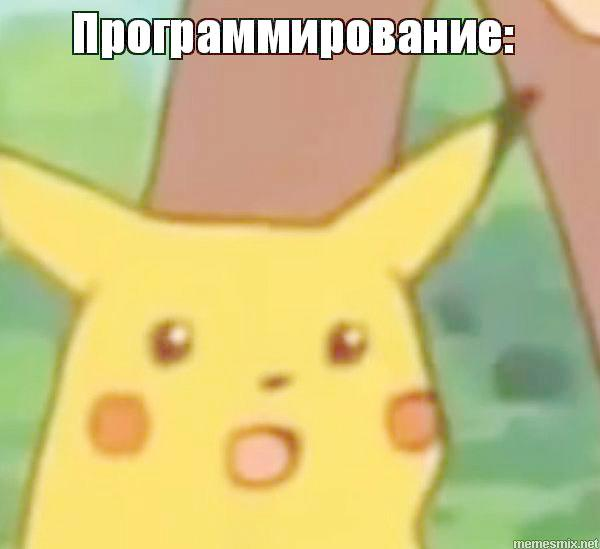

In [9]:
Disp(filename='gamma.jpg')

In [10]:
del draw
del drawg

In [11]:
image = Image.open(imageName) #Открываем изображение.
image2 = Image.open('gamma.jpg')
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

print('Исходное изображение:')
print('width = {}, height = {}'.format(width, height))

width2 = image2.size[0] #Определяем ширину. 
height2 = image2.size[1] #Определяем высоту. 

print('Линеаризованное изображение:')
print('width = {}, height = {}'.format(width2, height2))

if width != width2 or height != height2:
    print("Error: Sizes are not equalse!")


Исходное изображение:
width = 600, height = 549
Линеаризованное изображение:
width = 600, height = 549


In [12]:
from math import fabs
pix1 = image.load()
pix2 = image2.load()
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 

for i in range(width):
    for j in range(height):
        r = round(fabs(pix1[i, j][0] - pix2[i, j][0]))
        g = round(fabs(pix1[i, j][1] - pix2[i, j][1]))
        b = round(fabs(pix1[i, j][2] - pix2[i, j][2]))
        draw.point((i, j), (r, g, b))

In [13]:
image.save("diff1.jpg", "JPEG")

Разница между исходным изображением и линеаризованным:


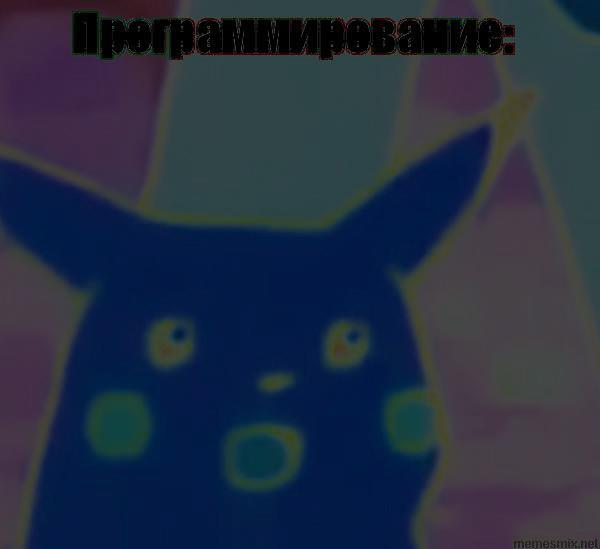

In [14]:
print('Разница между исходным изображением и линеаризованным:')
Disp(filename='diff1.jpg')

In [15]:
del draw

# Перевод цветов изображения из линейного RGB в XYZ с использованием матрицы:

## Самописная функция:

In [16]:
def rgb2lab(inputColor):
    num = 0
    RGB = [0, 0, 0]
    for value in inputColor :
        value = float(value) / 255
        if value > 0.04045 :
            value = ((value + 0.055)/1.055)**2.4
        else :
            value = value / 12.92
        RGB[num] = value * 100
        num = num + 1
    XYZ = [0, 0, 0]

    X = RGB [0] * 0.4124 + RGB [1] * 0.3576 + RGB [2] * 0.1805
    Y = RGB [0] * 0.2126 + RGB [1] * 0.7152 + RGB [2] * 0.0722
    Z = RGB [0] * 0.0193 + RGB [1] * 0.1192 + RGB [2] * 0.9505
    
    XYZ[0] = round(X, 4)
    XYZ[1] = round(Y, 4)
    XYZ[2] = round(Z, 4)

    XYZ[0] = float(XYZ[0]) / 95.047         # ref_X =  95.047   Observer= 2°, Illuminant= D65
    XYZ[1] = float(XYZ[1]) / 100.0          # ref_Y = 100.000
    XYZ[2] = float(XYZ[2]) / 108.883        # ref_Z = 108.883

    num = 0
    for value in XYZ :
        if value > 0.008856 :
            value = value ** (0.3333333333333333)
        else :
            value = (7.787 * value) + (16 / 116)

        XYZ[num] = value
        num = num + 1

    Lab = [0, 0, 0]

    L = ( 116 * XYZ[ 1 ] ) - 16
    a = 500 * ( XYZ[ 0 ] - XYZ[ 1 ] )
    b = 200 * ( XYZ[ 1 ] - XYZ[ 2 ] )

    Lab [0] = round(L, 4)
    Lab [1] = round(a, 4)
    Lab [2] = round(b, 4)

    return Lab

In [17]:
def rgb2lab(RGB):
    var_R = (RGB[0] / 255)
    var_G = (RGB[1] / 255)
    var_B = (RGB[2] / 255)

    if var_R > 0.04045:
        var_R = ((var_R + 0.055) / 1.055) ** 2.4
    else:
        var_R = var_R / 12.92
    if var_G > 0.04045:
        var_G = ((var_G + 0.055) / 1.055) ** 2.4
    else:
        var_G = var_G / 12.92
    if var_B > 0.04045:
        var_B = ((var_B + 0.055) / 1.055) ** 2.4
    else:
        var_B = var_B / 12.92

    X = (var_R * 0.4124 + var_G * 0.3576 + var_B * 0.1805) * 100
    Y = (var_R * 0.2126 + var_G * 0.7152 + var_B * 0.0722) * 100
    Z = (var_R * 0.0193 + var_G * 0.1192 + var_B * 0.9505) * 100
    return X, Y, Z

In [18]:
image = Image.open(imageName) #Открываем изображение.
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

pix = image.load()
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 

for i in range(width):
    for j in range(height):
        colorRes = rgb2lab(pix1[i,j])
        #print(pix1[i,j])
        #print(colorRes)
        XYZ=[0, 0, 0]
        XYZ[0] = round(colorRes[0] * 10)
        XYZ[1] = round(colorRes[1] * 10)
        XYZ[2] = round(colorRes[2] * 10)
        #colorRes[0] = round(colorRes[0])
        #colorRes[1] = round(colorRes[1])
        #colorRes[2] = round(colorRes[2])
        draw.point((i, j), (XYZ[0], XYZ[1], XYZ[2]))

In [19]:
image.save("RGB2XYZ_1.jpg", "JPEG")

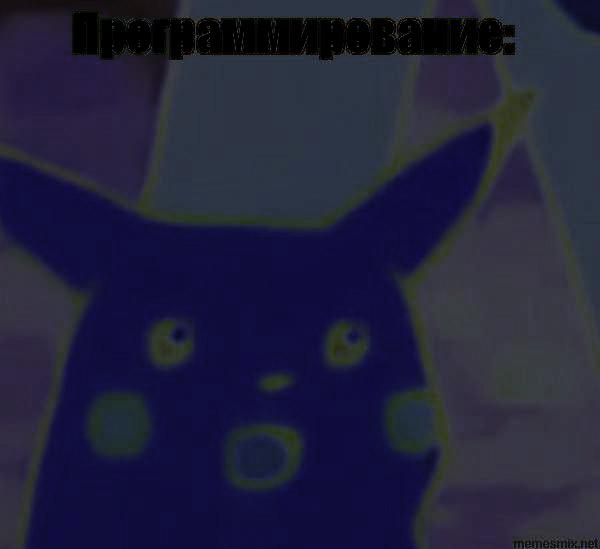

In [31]:
Disp(filename='RGB2XYZ_1.jpg')

Text(0.5, 1.0, 'MY_CIEXYZ')

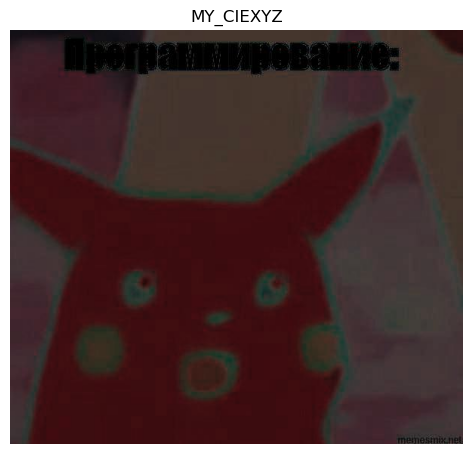

In [32]:
image_RGB = cv2.imread("RGB2XYZ_1.jpg")
plt.figure(figsize = (6.0,5.49), dpi=100)
plt.imshow(image_RGB)
plt.axis('off')
plt.title('MY_CIEXYZ')

## Библиотечное преобразование:

Text(0.5, 1.0, 'image_CIEXYZ')

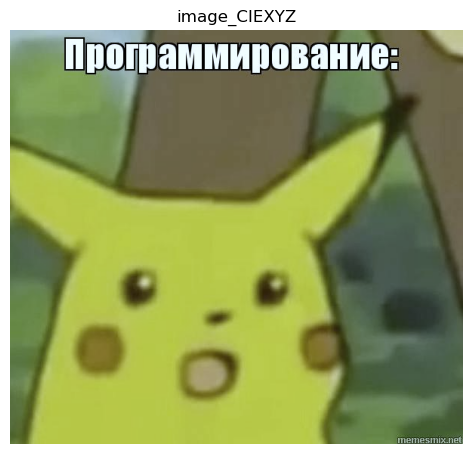

In [21]:
image_RGB = cv2.imread("temp.jpg")
image_CIEXYZ = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2XYZ)
plt.figure(figsize = (6.0,5.49), dpi=100)
plt.imshow(image_CIEXYZ)
plt.axis('off')
plt.title('image_CIEXYZ')

In [22]:
import cv2
import numpy as np

color_image = cv2.imread(imageName)

print(color_image.shape)

(549, 600, 3)


In [23]:
#cv2.imshow('Color all',color_image)
#cv2.imshow('Color blue',color_image[:,:,0])
#cv2.imshow('Color green',color_image[:,:,1])
#cv2.imshow('Color red',color_image[:,:,2])

(-0.5, 599.5, 548.5, -0.5)

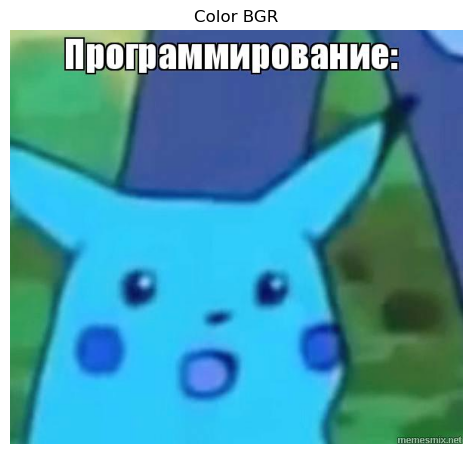

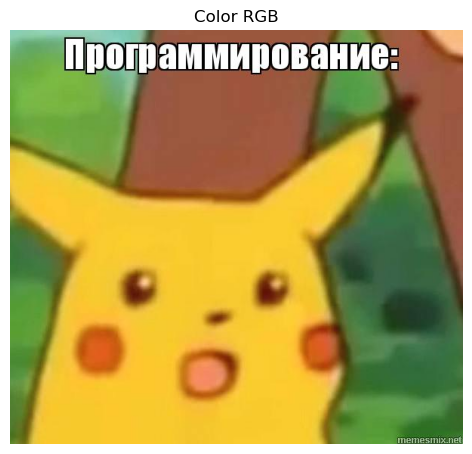

In [24]:
color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (6.0,5.49), dpi=100)
plt.title('Color BGR')
plt.imshow(color_image)
plt.axis('off')

plt.figure(figsize = (6.0,5.49), dpi=100)
plt.title('Color RGB')
plt.imshow(color_image_rgb)
plt.axis('off')

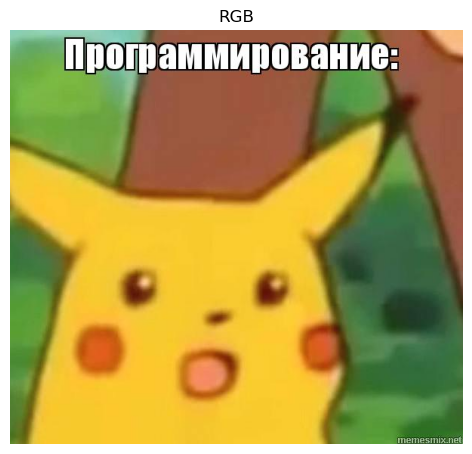

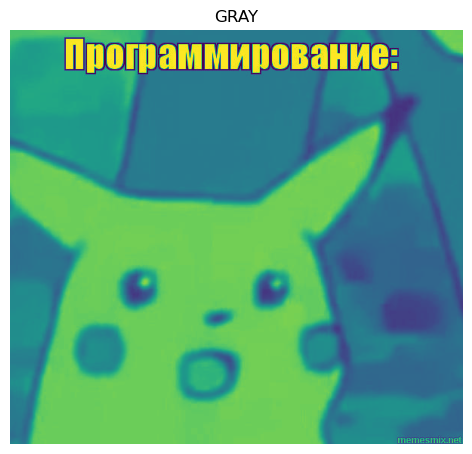

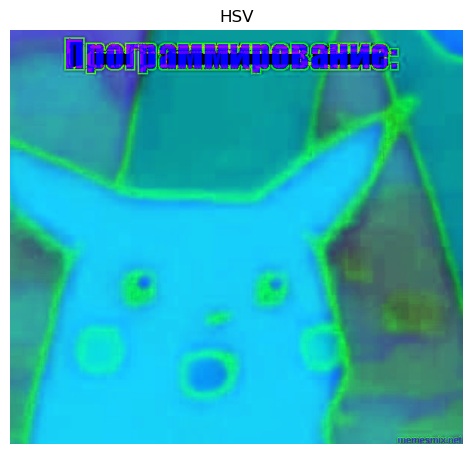

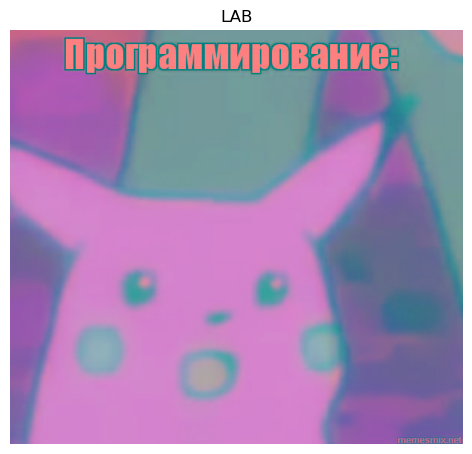

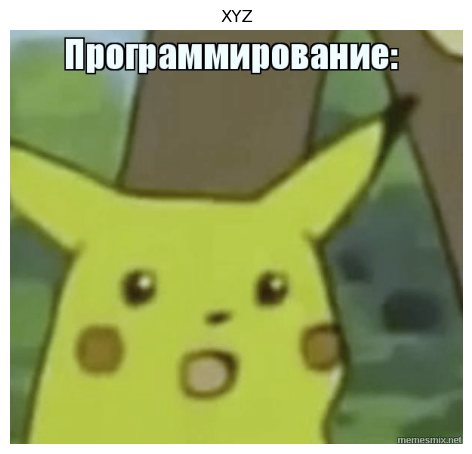

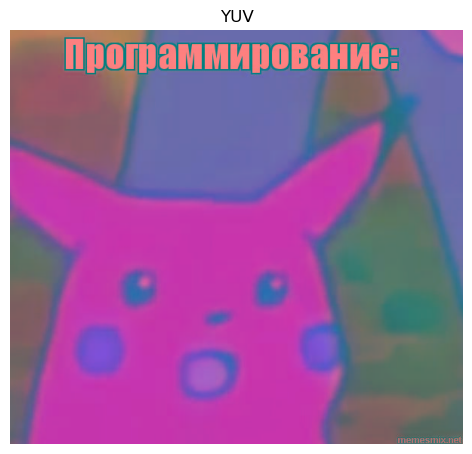

In [25]:
color_spaces = ('RGB','GRAY','HSV','LAB','XYZ','YUV')
image_bgr = color_image
color_images = []
for color in color_spaces:
    color_images.append(cv2.cvtColor(image_bgr, getattr(cv2,'COLOR_BGR2' + color)))
    
k = 0;
for color in color_images:
    plt.figure(figsize = (6.0,5.49), dpi=100)
    plt.title(color_spaces[k])
    plt.imshow(color)
    plt.axis('off')
    k += 1


In [26]:
# convert to linear
def linearize(v):
    if v <= 0.04045:
        return v / 12.92
    else:
        return ((v + 0.055) / 1.055) ** 2.4

def getXYZ(RGB):
    R = RGB[0]
    G = RGB[1]
    B = RGB[2]
    
    # assume RGB are 0 - 255 ... convert to 0 - 1
    R /= 255.0
    G /= 255.0
    B /= 255.0
        
    # linear rgb
    r = linearize(R)
    g = linearize(G)
    b = linearize(B)
    
    # through matrix to XYZ
    x = 0.4124 * r + 0.3576 * g + 0.1805 * b
    y = 0.2126 * r + 0.7152 * g + 0.0722 * b
    z = 0.0193 * r + 0.1192 * g + 0.9505 * b
    
    # that xyz is in 0 - 1, convert to the standard 0 - 100 for Y
    XYZ = [0, 0, 0]
    
    XYZ[0] = x * 100.0
    XYZ[1] = y * 100.0
    XYZ[2] = z * 100.0
    
    return XYZ

In [27]:
imageName= 'gamma.jpg'
image = Image.open(imageName) #Открываем изображение.
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 
width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

pix = image.load()
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 

for i in range(width):
    for j in range(height):
        colorRes = getXYZ(pix1[i,j])
        XYZ=[0, 0, 0]
        XYZ[0] = round(colorRes[0] * 10)
        XYZ[1] = round(colorRes[1] * 10)
        XYZ[2] = round(colorRes[2] * 10)
        draw.point((i, j), (XYZ[0], XYZ[1], XYZ[2]))
        
image.save("RGB2XYZ_2.jpg", "JPEG")

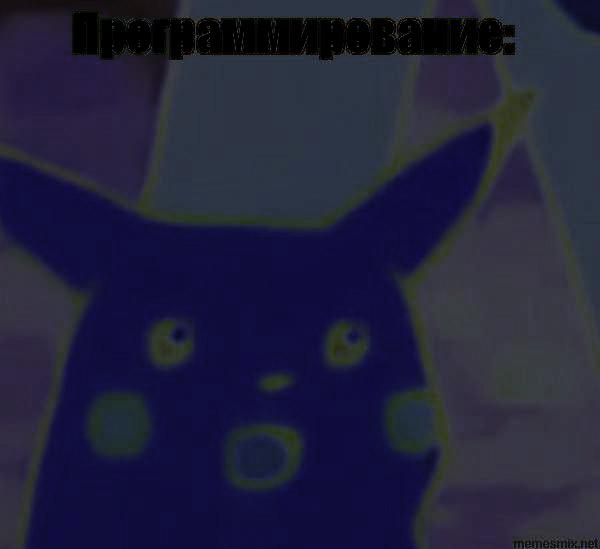

In [28]:
Disp(filename="RGB2XYZ_2.jpg")

In [29]:


import skimage.color
from numpy import int32

image = Image.open('temp.jpg')

width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

pix = image.load()
draw = ImageDraw.Draw(image) #Создаем инструмент для рисования. 

for i in range(width):
    for j in range(height):
        XYZ = skimage.color.rgb2xyz((pix1[i,j] / 255 * (2**31 - 1)).astype(int32)) #getXYZ(pix1[i,j])
        #XYZ=[0, 0, 0]
        #XYZ[0] = round(colorRes[0] * 10)
        #XYZ[1] = round(colorRes[1] * 10)
        #XYZ[2] = round(colorRes[2] * 10)
        draw.point((i, j), (XYZ[0], XYZ[1], XYZ[2]))

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [ ]:
import skimage.color
from numpy import int32

image = Image.open('temp.jpg')

pix = image.load()

width = image.size[0] #Определяем ширину. 
height = image.size[1] #Определяем высоту. 

myList = []

for i in range(width):
    tmp = []
    for j in range(height):
        XYZ=[0, 0, 0]
        XYZ[0] = pix[i,j][0]
        XYZ[1] = pix[i,j][1]
        XYZ[2] = pix[i,j][2]
        tmp.append(XYZ)
    myList.append(tmp)

#rgb = array([array([[56,79,132],[255,100,70]])]) 
i1 = skimage.color.rgb2xyz((myList / 255 * (2**31 - 1)).astype(int32))
print(i1)